<a href="https://colab.research.google.com/github/JamalMorales/PDI/blob/main/PR%C3%81CTICAS%20PDI/Pr%C3%A1ctica_4_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cargamos la libreria de Github para tener acceso a nuestras imagenes primero**

In [7]:
!git clone https://github.com/JamalMorales/PDI.git
%cd PDI
!ls -R

Cloning into 'PDI'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 35 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 201.02 KiB | 1.70 MiB/s, done.
Resolving deltas: 100% (7/7), done.
/content/PDI/PDI/PDI
.:
IMAGENES  PRÁCTICAS  README.md

./IMAGENES:
contraste.jpg  flor.jpg  frutas.jpg  medica.jpg

./PRÁCTICAS:
'hola 1'


# **Despues cargamos nuestro codigo correspondiente**

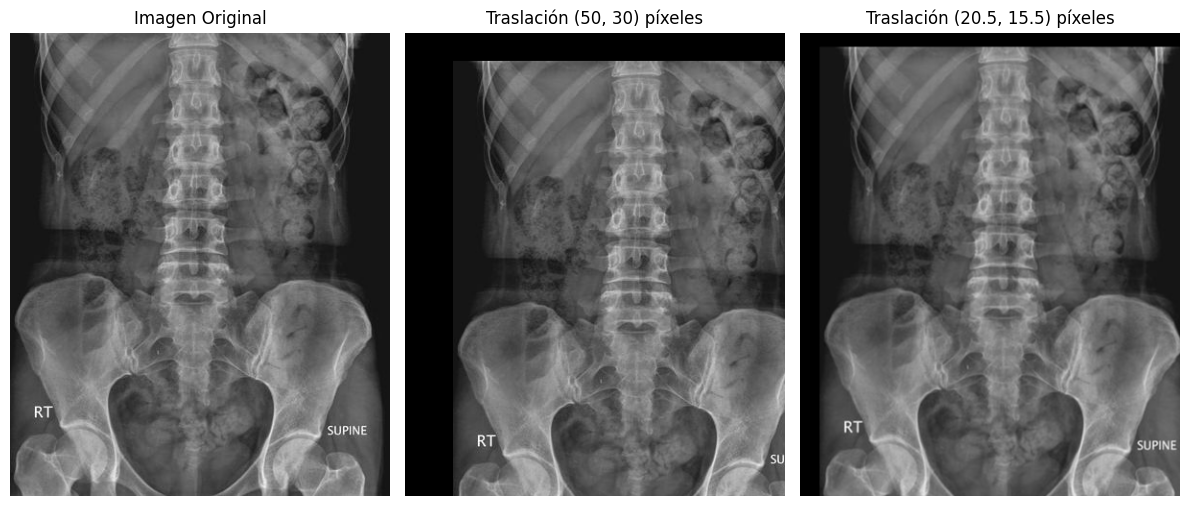

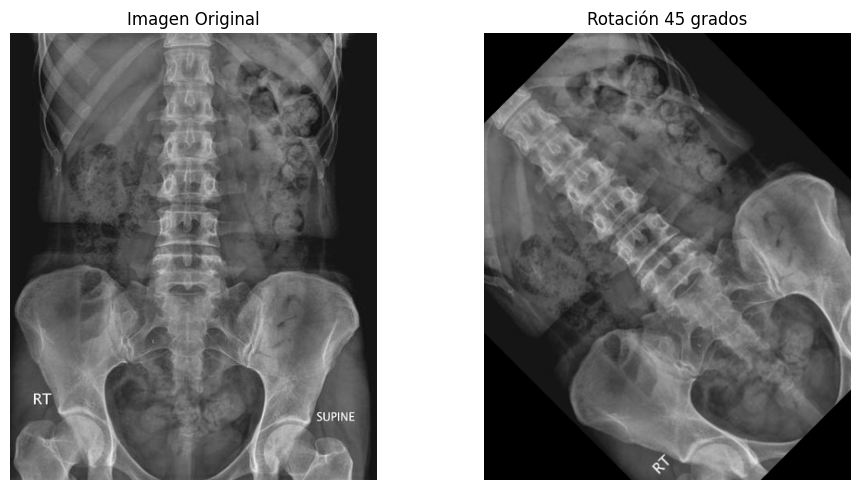

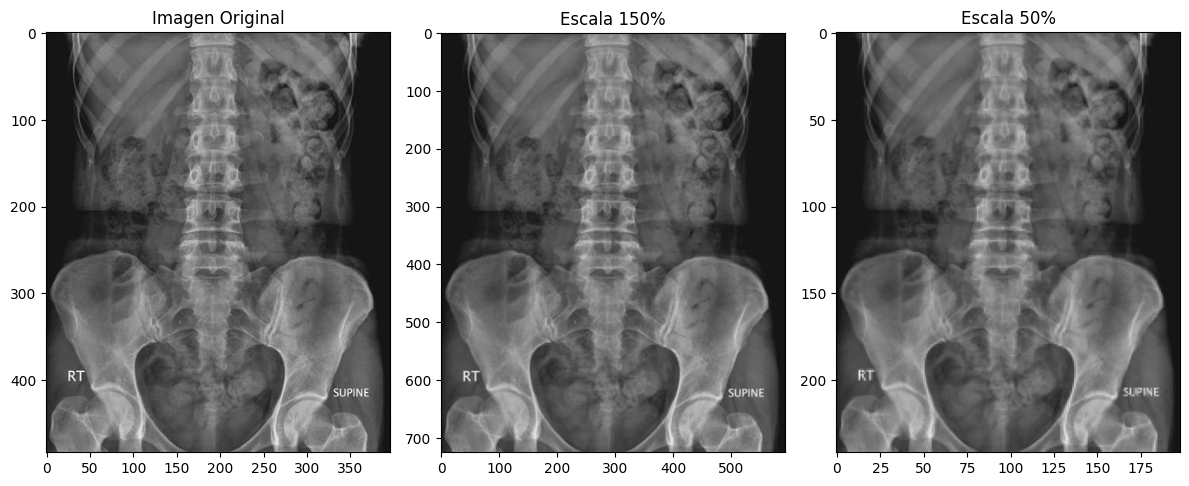

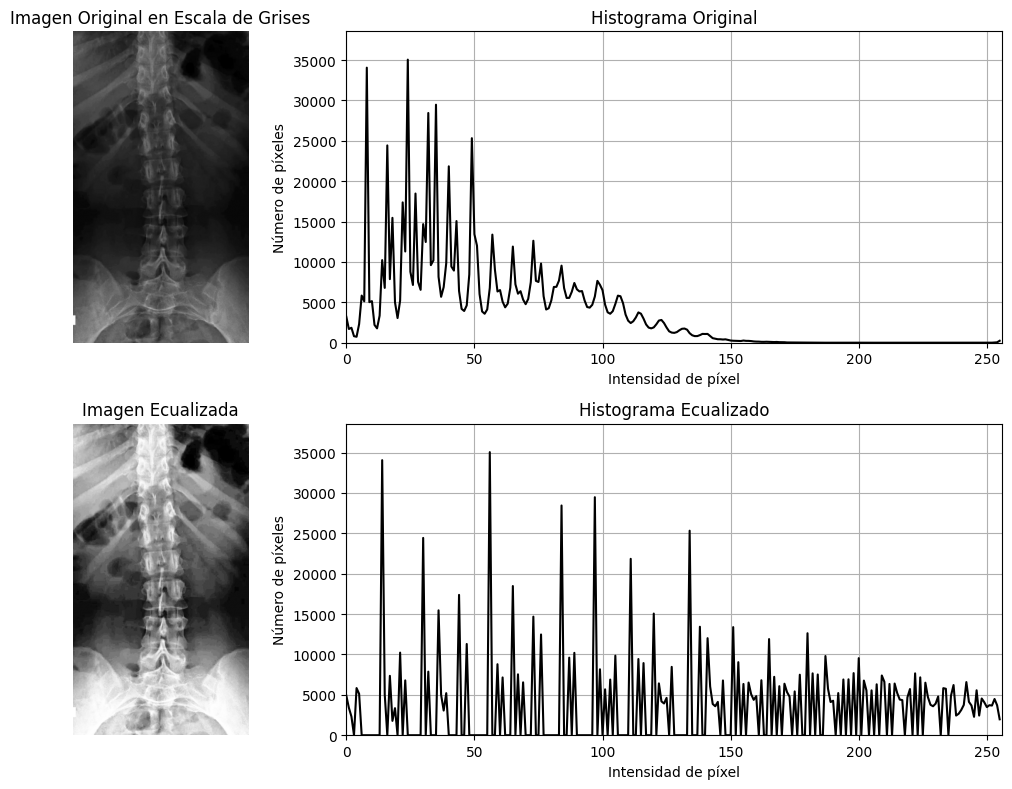

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Jamal Morales Sánchez 2064497
#Evelyn Rubí Martinez Ruiz 2071292
#Abigail Montserrat Nieto Solís 2059067
#Reynaldo Holsen Gallegos González	1963727
#Jesús Antonio Segura Vences	1851396

# -------------------------------
# Parte 1: Procesamiento Geométrico
# -------------------------------

# -------------------------------
# Ejercicio 1: Traslación
# -------------------------------

# Cargar imagen en color

img_color = cv2.imread('IMAGENES/medica.jpg')
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

#  Aplicar una traslación de (50, 30) píxeles en la dirección (x, y).

# Dimensiones de la imagen

rows, cols = img_rgb.shape[:2]

# Definir la matriz de traslación para (50, 30)

tx, ty = 50, 30
M1 = np.float32([[1, 0, tx], [0, 1, ty]])

# Aplicar la transformación afin

img_trans1 = cv2.warpAffine(img_rgb, M1, (cols, rows))

# Aplicamos la traslación con valores decimales (20.5, 15.5) pixeles

tx_dec, ty_dec = 20.5, 15.5
M2 = np.float32([[1, 0, tx_dec], [0, 1, ty_dec]])

# Aplicar la transformación afin

img_trans2 = cv2.warpAffine(img_rgb, M2, (cols, rows), flags=cv2.INTER_LINEAR)

# Mostrar las imágenes

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_trans1)
plt.title('Traslación (50, 30) píxeles')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_trans2)
plt.title('Traslación (20.5, 15.5) píxeles')
plt.axis('off')

plt.tight_layout()
plt.show()

# -------------------------------
# Ejercicio 2: Rotación
# -------------------------------

# Definimos rotación de 45 grados alrededor del centro de la imagen

angulo = 45
centro = (cols // 2, rows // 2)
escala = 1.0

M_rot = cv2.getRotationMatrix2D(centro, angulo, escala)

# Aplicar la rotación

img_rotada = cv2.warpAffine(img_rgb, M_rot, (cols, rows))

# Mostrar las imágenes

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_rotada)
plt.title('Rotación 45 grados')
plt.axis('off')

plt.tight_layout()
plt.show()

# -------------------------------
# Ejercicio 3: Escala
# -------------------------------

# Escalar la imagen al 150% y 50%

escala_150 = 1.5
escala_050 = 0.5

img_esc_150 = cv2.resize(img_rgb, None, fx=escala_150, fy=escala_150, interpolation=cv2.INTER_LINEAR)
img_esc_050 = cv2.resize(img_rgb, None, fx=escala_050, fy=escala_050, interpolation=cv2.INTER_LINEAR)

# Mostrar las imágenes

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(img_esc_150)
plt.title('Escala 150%')

plt.subplot(1, 3, 3)
plt.imshow(img_esc_050)
plt.title('Escala 50%')

plt.tight_layout()
plt.show()

# -------------------------------
# Parte 2: Ecualización de histograma
# -------------------------------

# Cargar imagen en escala de grises

img2_rgb = cv2.imread('IMAGENES/contraste.jpg')
img2_gray = cv2.cvtColor(img2_rgb, cv2.COLOR_BGR2GRAY)

# Obtener histograma original

hist_original = cv2.calcHist([img2_gray], [0], None, [256], [0, 256])

# Aplicar ecualización de histograma

img2_eq = cv2.equalizeHist(img2_gray)

# Obtener histograma ecualizado

hist_eq = cv2.calcHist([img2_eq], [0], None, [256], [0, 256])

# Mostrar imágenes y histogramas

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img2_gray, cmap='gray')
plt.title('Imagen Original en Escala de Grises')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(hist_original, color='black')
plt.title('Histograma Original')
plt.xlim([0, 256])
plt.ylim([0, max(hist_original)*1.1])
plt.grid()
plt.xlabel('Intensidad de píxel')
plt.ylabel('Número de píxeles')
plt.tight_layout()

plt.subplot(2, 2, 3)
plt.imshow(img2_eq, cmap='gray')
plt.title('Imagen Ecualizada')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.plot(hist_eq, color='black')
plt.title('Histograma Ecualizado')
plt.xlim([0, 256])
plt.ylim([0, max(hist_eq)*1.1])
plt.grid()
plt.xlabel('Intensidad de píxel')
plt.ylabel('Número de píxeles')
plt.tight_layout()

plt.tight_layout()
plt.show()